## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [148]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [149]:
cars.loc[1111,'Engine Size(L)']

3.0

In [150]:
# Look at the first ten items in the CO2 emissions array
cars_co2_emissions[:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212])

## 💪 Challenge I
Help your colleague gain insights on the type of vehicles that have lower CO2 emissions. Include:

1. What is the median engine size in liters?
2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  
3. What is the correlation between fuel consumption and CO2 emissions?
4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 
5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?
6. Any other insights you found during your analysis?

In [151]:
np.median(cars_engine_sizes)

3.0

In [170]:
cars_z= cars[cars['Fuel Type']=='Z']
cars_x= cars[cars['Fuel Type']=='X']
cars_e= cars[cars['Fuel Type']=='E']
cars_d= cars[cars['Fuel Type']=='D']

In [168]:
np.mean(cars_z['Fuel Consumption Comb (L/100 km)']) 

11.422767020612117

In [171]:
np.mean(cars_x['Fuel Consumption Comb (L/100 km)'])

10.084575199340117

In [172]:
np.mean(cars_e['Fuel Consumption Comb (L/100 km)'])

16.861351351351352

In [173]:
np.mean(cars_d['Fuel Consumption Comb (L/100 km)'])

8.835428571428572

In [175]:
for fuel in ['Z','X','E','D']:
    cars_f=cars[cars['Fuel Type']==fuel]
    print(np.mean(cars_f['Fuel Consumption Comb (L/100 km)']))

11.422767020612117
10.084575199340117
16.861351351351352
8.835428571428572


<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

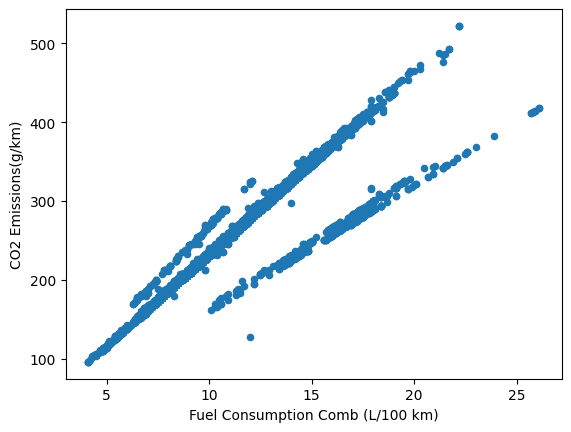

In [179]:
cars.plot('Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)',kind='scatter')

In [184]:
print(np.mean(cars[cars['Vehicle Class']=='SUV - SMALL']['CO2 Emissions(g/km)']))
np.mean(cars[cars['Vehicle Class']=='MID-SIZE']['CO2 Emissions(g/km)'])

236.29252259654888


222.45542806707854

#Small SUVs emit more co2 per km than the mid sized vehicles

In [186]:
print(np.mean(cars['CO2 Emissions(g/km)']))
np.mean(cars[cars['Engine Size(L)']<=2.0]['CO2 Emissions(g/km)'])

250.58469871360867


198.26783530370975

#Average CO2 emissions for all the vehicles is about 250 grams per km while for small vehicles with engine capacity less than or equal to 2 litres it is about 198 grams per km